In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-data-analysis/UberDataset.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/uber-data-analysis/UberDataset.csv')
pd.set_option('mode.chained_assignment',None) #

In [4]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
# Removing last row
df.drop(1155,inplace = True)

## Data Formatting : Checking Data Types

In [6]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [7]:
#Replacing '/' from date columns
df.loc[:,'START_DATE'] = df.loc[:,'START_DATE'].str.replace('/','-',regex=False)
df.loc[:,'END_DATE'] = df.loc[:,'END_DATE'].str.replace('/','-',regex=False)

In [8]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12-31-2016 1:07,12-31-2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12-31-2016 13:24,12-31-2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12-31-2016 15:03,12-31-2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12-31-2016 21:32,12-31-2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [9]:
# Converting 'START_DATE' and 'END_DATE' to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'],format = '%m-%d-%Y %H:%M')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],format = '%m-%d-%Y %H:%M')

## Data Formatting :missing values

In [10]:
# Checking for missing values
df.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

## Analyzing Data

**Checking For Time Range**

In [11]:
min_time_start = df['START_DATE'].min()
max_time_start = df['START_DATE'].max()
print("Start Time range is from ",min_time_start," to ",max_time_start)

Start Time range is from  2016-01-01 21:11:00  to  2016-12-31 22:08:00


In [12]:
min_time_end = df['END_DATE'].min()
max_time_end = df['END_DATE'].max()
print("End Time range is from ",min_time_end," to ",max_time_end)

End Time range is from  2016-01-01 21:17:00  to  2016-12-31 23:51:00


<h4> Question 1: Average speed of Each Category </h4>

In [13]:
# Calculating time taken for each ride
df['time_ride'] = df['END_DATE'] - df['START_DATE']
df['time_ride']

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Name: time_ride, Length: 1155, dtype: timedelta64[ns]

In [14]:
# hours taken for each ride
df['hours_ride'] = df['time_ride'].dt.components['hours'] + df['time_ride'].dt.components['minutes']/60 + df['time_ride'].dt.components['minutes']/3600
df['hours_ride'] 

0       0.101667
1       0.203333
2       0.220278
3       0.237222
4       1.118611
          ...   
1150    0.118611
1151    0.305000
1152    0.593056
1153    0.305000
1154    1.728611
Name: hours_ride, Length: 1155, dtype: float64

In [15]:
# Converting distance covered in each ride in Kms
distance_in_km = df['MILES']*1.6
df['Kms'] = distance_in_km
df['Kms']

0         8.16
1         8.00
2         7.68
3         7.52
4       101.92
         ...  
1150      1.12
1151      6.24
1152     25.92
1153     10.24
1154     77.12
Name: Kms, Length: 1155, dtype: float64

In [16]:
# Average speed in Km/hour
df['avg_speed(Km/hour)'] = df['Kms']/df['hours_ride']

In [17]:
#Removing infinte values from column 'avg_speed(Km/hour)' because for some rides time taken is zero
row_index = 0
for i in df['avg_speed(Km/hour)']:
    if np.isfinite(i) == False:
        df.drop(row_index,inplace = True)
    row_index = row_index+1

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


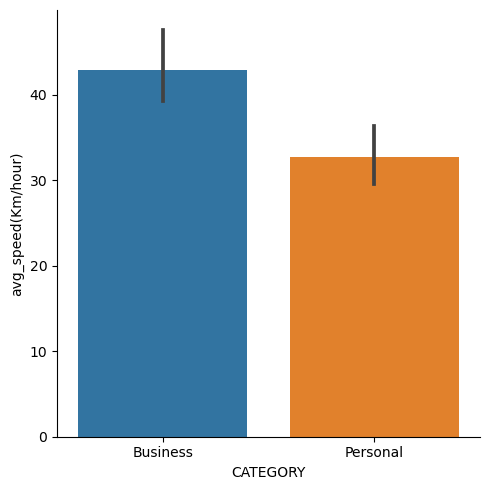

In [18]:
# Average speed in Km/hour for each category
sns.catplot(x = 'CATEGORY', y = 'avg_speed(Km/hour)', data = df, kind ='bar')
plt.show()

<h3> Observation 1</h3>
<h4> Average speed of Business category is more than 40 Kmph and that of Personal category is approx 30 Kmph. </h4>

<h4> Question 2 : Finding Top destination and departures. </h4>

In [19]:
# Analyzing Departure - Destination for rides
departure_destination = df['START'] +" - " + df ['STOP']
departure_destination_df = pd.DataFrame(departure_destination.value_counts())
departure_destination_df.reset_index(inplace = True)
departure_destination_df.rename(columns = {'index':'Departure - Destination',0:'No of rides'},inplace = True)

# listing top departure - destination pair
departure_destination_df_top = departure_destination_df.sort_values('No of rides',ascending = False).head(13)
departure_destination_df_top

,Departure - Destination,No of rides
0,Unknown Location - Unknown Location,84
1,Morrisville - Cary,75
2,Cary - Morrisville,67
3,Cary - Cary,53
4,Cary - Durham,36
5,Durham - Cary,32
6,Islamabad - Unknown Location,28
7,Unknown Location - Islamabad,28
8,Lahore - Lahore,27
9,Islamabad - Islamabad,24


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


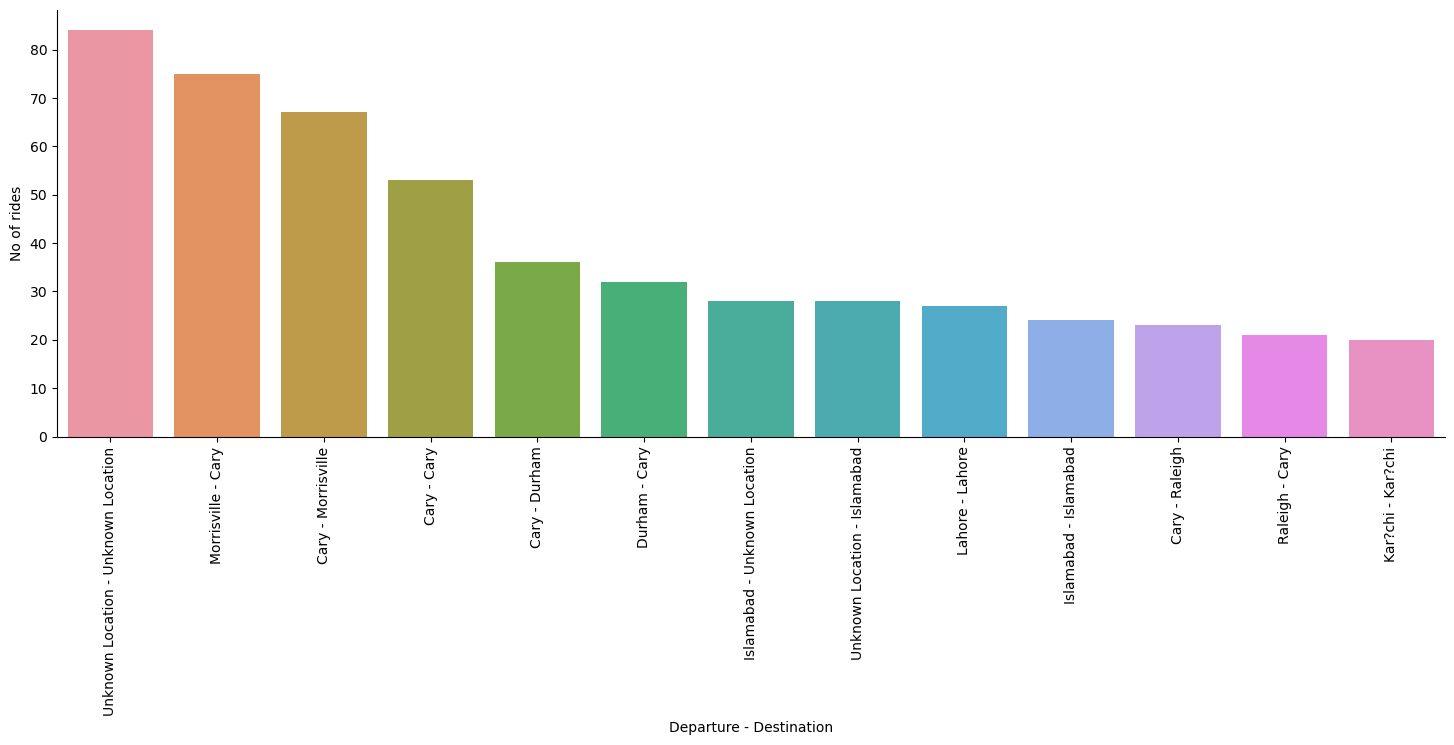

In [20]:
sns.catplot(x = 'Departure - Destination',y ='No of rides',data = departure_destination_df_top,kind='bar',height = 5 , aspect =3)
plt.xticks(rotation = 90)
plt.show()

<h3> Observation 2 </h3>
<h4> Morrisvile and Cary are Top destinations and departures.</h4>

<h4>Question 3 : Finding top purpose with top destinations.</h4>

In [21]:
# Creating new dataframe which contains no NaN
df_non_na = df.copy()
df_non_na.dropna(inplace = True)
df_non_na.reset_index(inplace = True,drop = True)

In [22]:
df_non_na

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,time_ride,hours_ride,Kms,avg_speed(Km/hour)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,0.101667,8.16,80.262295
1,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,0.220278,7.68,34.865069
2,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,0.237222,7.52,31.700234
3,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,1.118611,101.92,91.112987
4,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,0 days 00:04:00,0.067778,6.88,101.508197
...,...,...,...,...,...,...,...,...,...,...,...
648,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00,0.118611,1.12,9.442623
649,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,0.305000,6.24,20.459016
650,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,0.593056,25.92,43.705855
651,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,0.305000,10.24,33.573770


In [23]:
destination_purpose = df_non_na[['STOP','PURPOSE']].value_counts()
destination_purpose = pd.DataFrame(destination_purpose)
destination_purpose.reset_index(inplace = True)
destination_purpose.rename(columns = {0:'No of rides'},inplace = True)
destination_purpose_top = destination_purpose.sort_values('No of rides',ascending = False).head(10)
destination_purpose_top

,STOP,PURPOSE,No of rides
0,Cary,Meeting,52
1,Cary,Meal/Entertain,36
2,Cary,Customer Visit,33
3,Morrisville,Meal/Entertain,28
4,Durham,Meeting,27
5,Cary,Errand/Supplies,24
6,Unknown Location,Meeting,15
7,Whitebridge,Errand/Supplies,14
8,Unknown Location,Temporary Site,14
9,Whitebridge,Meal/Entertain,13


<h3> Observation 3<h3>
<h4> Top pourpose with top destinations are Meeting, Meal, Entertainment, Customer visit in Cary. </h4>